In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# load the dataset
data = pd.read_csv(r"D:\machine learning\unicorns till sep 2022.csv")
print(data.shape)
print(data.columns)
data.head()



(1186, 7)
Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [4]:
data['Valuation ($B)'] = pd.to_numeric(data['Valuation ($B)'].apply(lambda x:x.replace('$','')))


In [5]:
# month and year
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
data['Month'] = pd.DatetimeIndex(data['Date Joined']).month
data['Year'] = pd.DatetimeIndex(data['Date Joined']).year


In [6]:
data[['Investor_1','Investor_2','Investor_3','Investor_4']] = data['Investors'].str.split(',',expand =  True)
data.drop(columns = 'Investors',inplace = True)
data.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Month,Year,Investor_1,Investor_2,Investor_3,Investor_4
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,4,2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,12,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,7,2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,1,2014,Khosla Ventures,LowercaseCapital,capitalG,None
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,1,2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1186 non-null   object        
 1   Valuation ($B)  1186 non-null   float64       
 2   Date Joined     1186 non-null   datetime64[ns]
 3   Country         1186 non-null   object        
 4   City            1186 non-null   object        
 5   Industry        1186 non-null   object        
 6   Month           1186 non-null   int32         
 7   Year            1186 non-null   int32         
 8   Investor_1      1168 non-null   object        
 9   Investor_2      1118 non-null   object        
 10  Investor_3      1027 non-null   object        
 11  Investor_4      10 non-null     object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(8)
memory usage: 102.1+ KB


In [8]:
data.isnull().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Month                0
Year                 0
Investor_1          18
Investor_2          68
Investor_3         159
Investor_4        1176
dtype: int64

In [9]:
data[data.isnull().T.any()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Month,Year,Investor_1,Investor_2,Investor_3,Investor_4
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,12,2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,7,2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,1,2014,Khosla Ventures,LowercaseCapital,capitalG,None
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,1,2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None
5,Checkout.com,40.0,2019-05-02,United Kingdom,London,Fintech,5,2019,Tiger Global Management,Insight Partners,DST Global,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1181,LeadSquared,1.0,2022-06-21,India,Bengaluru,Internet software & services,6,2022,Gaja Capital Partners,Stakeboat Capital,WestBridge Capital,None
1182,FourKites,1.0,2022-06-21,United States,Chicago,"Supply chain, logistics, & delivery",6,2022,Hyde Park Venture Partners,Bain Capital Ventures,Hyde Park Angels,None
1183,VulcanForms,1.0,2022-07-05,United States,Burlington,"Supply chain, logistics, & delivery",7,2022,Eclipse Ventures,D1 Capital Partners,Industry Ventures,None
1184,SingleStore,1.0,2022-07-12,United States,San Francisco,Data management & analytics,7,2022,Google Ventures,Accel,Data Collective,None


In [10]:
data.nunique()

Company           1183
Valuation ($B)     222
Date Joined        695
Country             48
City               286
Industry            34
Month               12
Year                13
Investor_1         589
Investor_2         648
Investor_3         619
Investor_4          10
dtype: int64

# Data visualization

In [11]:
data.groupby('Industry')[['Investor_1','Investor_2','Investor_3','Investor_4']].count()

,Investor_1,Investor_2,Investor_3,Investor_4
Industry,,,,
"500 Global, Rakuten Ventures, Golden Gate Ventures",0,0,0,0
"Andreessen Horowitz, DST Global, IDG Capital",0,0,0,0
Artificial Intelligence,11,11,11,0
Artificial intelligence,74,70,66,2
Auto & transportation,40,38,32,1
"B Capital Group, Monk's Hill Ventures, Dynamic Parcel Distribution",0,0,0,0
Consumer & retail,28,25,20,0
Cybersecurity,58,58,56,0
Data management & analytics,45,45,42,1


In [12]:
data.loc[data['Industry'] == 'Artificial intelligence','Industry'] = 'Artificial Intelligence'
data.loc[data['Industry'] == 'Finttech','Industry'] = 'Fintech'

In [13]:
Industry_group = data.groupby('Industry')[['Investor_1','Investor_2','Investor_3','Investor_4']].count()
Industry_group

,Investor_1,Investor_2,Investor_3,Investor_4
Industry,,,,
"500 Global, Rakuten Ventures, Golden Gate Ventures",0,0,0,0
"Andreessen Horowitz, DST Global, IDG Capital",0,0,0,0
Artificial Intelligence,85,81,77,2
Auto & transportation,40,38,32,1
"B Capital Group, Monk's Hill Ventures, Dynamic Parcel Distribution",0,0,0,0
Consumer & retail,28,25,20,0
Cybersecurity,58,58,56,0
Data management & analytics,45,45,42,1
"Dragonfly Captial, Qiming Venture Partners, DST Global",0,0,0,0


In [14]:
Industry_group['Total_Investors'] = Industry_group[['Investor_1','Investor_2','Investor_3','Investor_4']].sum(axis=1)
Industry_group.drop(columns=['Investor_1','Investor_2','Investor_3','Investor_4'],inplace = True)
Industry_group1 = Industry_group.sort_values(by = 'Total_Investors',ascending=False)
Industry_group1

,Total_Investors
Industry,
Fintech,683
Internet software & services,640
E-commerce & direct-to-consumer,294
Health,266
Artificial Intelligence,245
"Supply chain, logistics, & delivery",191
Cybersecurity,172
Other,164
Data management & analytics,133


In [15]:
Industry_group =round(data['Industry'].value_counts(normalize = True)*100,2)
Industry_group

Industry
Fintech                                                               20.15
Internet software & services                                          18.89
E-commerce & direct-to-consumer                                        8.68
Health                                                                 7.93
Artificial Intelligence                                                7.17
Supply chain, logistics, & delivery                                    5.48
Other                                                                  5.48
Cybersecurity                                                          4.89
Data management & analytics                                            3.79
Auto & transportation                                                  3.37
Hardware                                                               3.20
Mobile & telecommunications                                            3.12
Edtech                                                                 2.70
Con

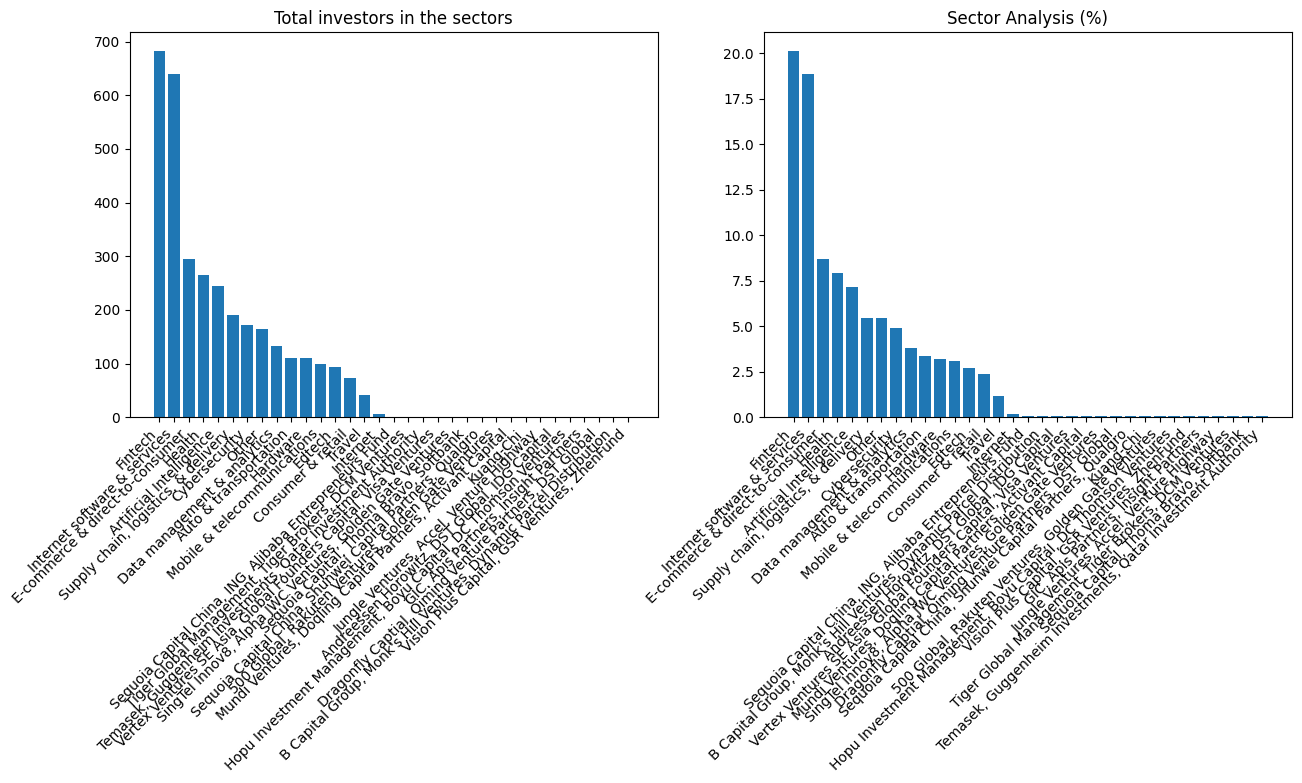

In [16]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Total investors in the sectors')

plt.bar(Industry_group1.index,Industry_group1.Total_Investors)
plt.xticks(rotation = 45,ha = 'right')

plt.subplot(1,2,2)
plt.title('Sector Analysis (%)')
plt.bar(Industry_group.index,Industry_group.values)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [17]:
analysis = round(data['Country'].value_counts(normalize = True)*100,2)
analysis = analysis.head(10).copy()
analysis


Country
United States     53.63
China             14.67
India              5.90
United Kingdom     3.88
Germany            2.45
France             2.02
Israel             1.85
Canada             1.60
Brazil             1.43
South Korea        1.43
Name: proportion, dtype: float64

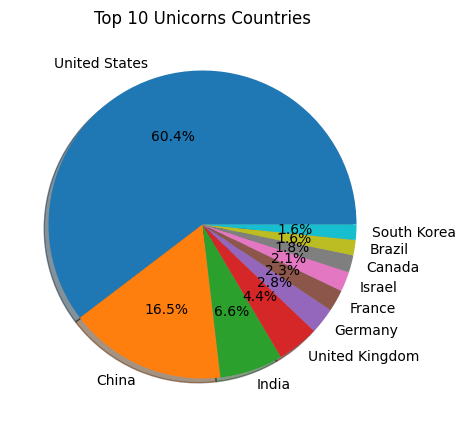

In [24]:
plt.figure(figsize = (8,5))
plt.title('Top 10 Unicorns Countries')
plt.pie(analysis,labels = analysis.index,shadow =True,startangle = 360,autopct = '%1.1f%%')
plt.show()

In [19]:
Grouping = data.groupby(by = ['Country','Year','Month','Company']).count().reset_index()
Grouping

,Country,Year,Month,Company,Valuation ($B),Date Joined,City,Industry,Investor_1,Investor_2,Investor_3,Investor_4
0,Argentina,2021,8,Uala,1,1,1,1,1,1,1,0
1,Australia,2018,1,Canva,1,1,1,1,1,1,1,0
2,Australia,2019,3,Airwallex,1,1,1,1,1,1,1,0
3,Australia,2021,5,SafetyCulture,1,1,1,1,1,1,1,0
4,Australia,2021,7,Culture Amp,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1181,United States,2022,8,Flow,1,1,1,1,1,0,0,0
1182,United States,2022,8,Incredible Health,1,1,1,1,1,1,1,0
1183,United States,2022,8,Orna Therapeutics,1,1,1,1,1,1,1,0
1184,Vietnam,2021,10,Sky Mavis,1,1,1,1,1,1,1,0


In [20]:
Grouping.loc[Grouping['Country'] == 'Brazil']

,Country,Year,Month,Company,Valuation ($B),Date Joined,City,Industry,Investor_1,Investor_2,Investor_3,Investor_4
16,Brazil,2018,7,Movile,1,1,1,1,1,1,1,0
17,Brazil,2018,11,iFood,1,1,1,1,1,1,1,0
18,Brazil,2019,6,Loggi,1,1,1,1,1,1,0,0
19,Brazil,2019,9,QuintoAndar,1,1,1,1,1,1,1,0
20,Brazil,2019,10,EBANX,1,1,1,1,1,1,0,0
21,Brazil,2019,12,Wildlife Studios,1,1,1,1,1,1,0,0
22,Brazil,2020,1,Loft,1,1,1,1,1,1,1,0
23,Brazil,2020,12,C6 Bank,1,1,1,1,1,0,0,0
24,Brazil,2020,12,Creditas,1,1,1,1,1,1,1,0
25,Brazil,2021,1,MadeiraMadeira,1,1,1,1,1,1,1,0


In [21]:
Grouping = data.groupby(by = ['Country'])['Valuation ($B)'].sum().reset_index().sort_values('Valuation ($B)',ascending = False)
Grouping                       

,Country,Valuation ($B)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88
17,France,58.42
1,Australia,54.40
7,Canada,49.23
23,Israel,48.02
6,Brazil,40.08


# Linkcode


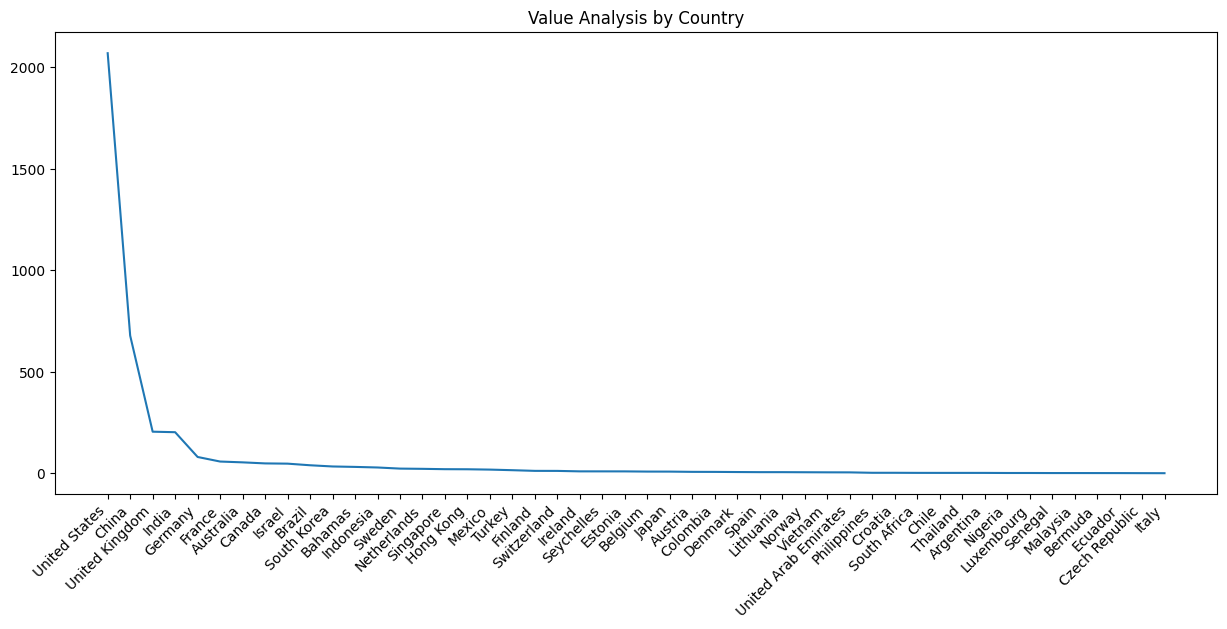

In [22]:
plt.figure(figsize=(15,6))
plt.title('Value Analysis by Country')
plt.plot(Grouping['Country'], Grouping['Valuation ($B)'])
plt.xticks(rotation = 45, ha= 'right')
plt.show()